In [1]:
import sympy
from sympy import *
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics as st
import seaborn as sns
from scipy.stats import chisquare

V1(v)= 0.1095915745277127 + 0.9621554324636283 v +- w0
-0.0334388644935828
u0 =  0.0809327654869210
w0 =  0.162885283818977
Power_divergenceResult(statistic=426.3622443074394, pvalue=4.117656684088825e-62)


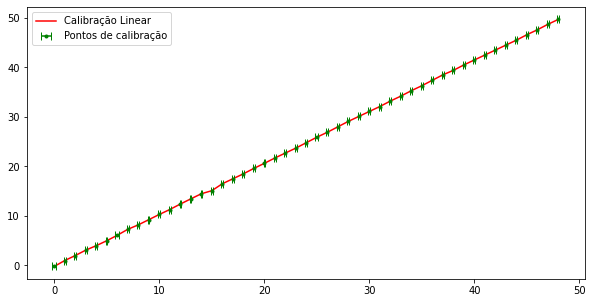

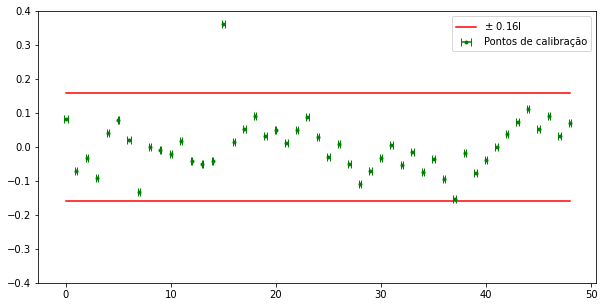

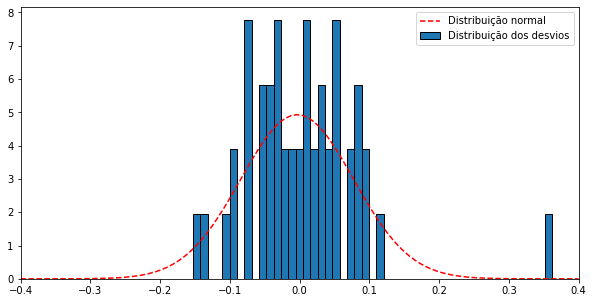

In [9]:
# Com todas as medições, função de 1° grau

y_i = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])
x_i = np.array([-0.2, 1, 2, 3.1, 4, 5, 6.1, 7.3, 8.2, 9.25, 10.3, 11.3, 12.4, 13.45, 14.48, 15.1, 16.5, 17.5, 18.5, 19.6, 20.62, 21.7, 22.7, 23.7, 24.8, 25.9, 26.9, 28, 29.1, 30.1, 31.1, 32.1, 33.2, 34.2, 35.3, 36.3, 37.4, 38.5, 39.4, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.6, 47.6, 48.7, 49.7])
Sigma_i = np.array([0.2, 0.1, 0.1, 0.1, 0.1, 0.05, 0.2, 0.1, 0.1, 0.05, 0.1, 0.1, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.05, 0.1, 0.1, 0.1, 0.1, 0.15, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

S = 0
S_x = 0
S_y = 0
S_xx = 0
S_xy = 0
for i in range(0, 48):
    S += 1/(Sigma_i[i]**2)
    S_x += x_i[i]/(Sigma_i[i]**2)
    S_y += y_i[i]/(Sigma_i[i]**2)
    S_xx += (x_i[i]**2)/(Sigma_i[i]**2)
    S_xy += (x_i[i]*y_i[i])/(Sigma_i[i]**2)

delta = (S*S_xx)-(S_x**2)
a = ((S_y*S_xx)-(S_x*S_xy))/(delta)
b = ((S*S_xy)-(S_x*S_y))/(delta)
print("V1(v)=", a,"+",b,"v +- w0")

def p(x):
    return a + b*x

vn = []
for i in range(49):
    vn.append(p(x_i[i]))

    
# Cálculo da incerteza

Vn_vi = 0
di = 0
di_2 = 0
t_48 = 2.0126

Vn_vi = []
di = []

for i in range(0, 48):
    Vn_vi = a+b*x_i[i]
    di = Vn_vi-y_i[i]
    di_2 += di**2

u0 = sqrt(di_2/48)
w0 = u0*t_48
w1 = np.array([0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16])
print("u0 = ", u0)
print("w0 = ", w0)

test = chisquare(x_i)
print(test)
# Plotagem dos gráficos
    
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.figure()
plt.plot(y_i,x_i,label='Calibração Linear',color='red')
plt.errorbar(y_i,x_i,xerr=Sigma_i,fmt='.', capsize=4, label='Pontos de calibração',color='green')
plt.legend()
plt.show()

di=vn-y_i

plt.figure()
plt.ylim([-.4,.4])
plt.errorbar(y_i,-di,xerr=Sigma_i,fmt='.', capsize=4, label='Pontos de calibração',color='green')
plt.plot(y_i,w1,label='$\pm$ 0.16l',color='red')
plt.plot(y_i,-w1,color='red')
plt.legend()
plt.show()

plt.figure()
plt.xlim([-.4,.4])
plt.hist(-di,bins = len(di), density = True,edgecolor="black",label="Distribuição dos desvios")
xmin,xmax = plt.xlim()
med = st.mean(di)
desv = 0.0809327654869210
eix = np.linspace(xmin,xmax,100)
eiy = norm.pdf(eix,med,desv)
plt.plot(eix,eiy,color='red', label="Distribuição normal", linestyle="--")
plt.legend()
plt.show() 

V1(v)= 0.09948172834110212 + 0.9623574936066308 v +- w0
u0 =  0.0621564994914234
w0 =  0.125161435200905


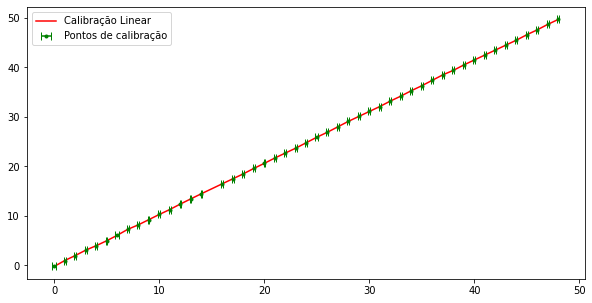

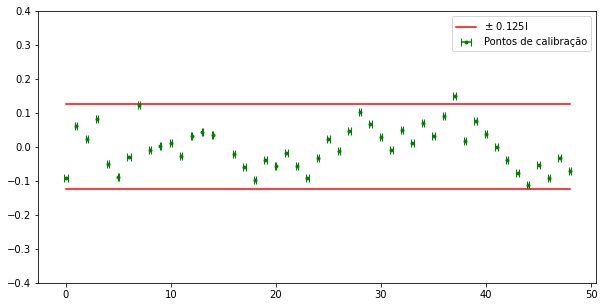

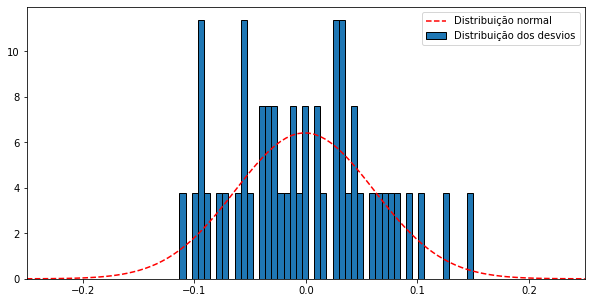

In [3]:
# Sem a medição 15, função de 1° grau

y_i_2 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])
x_i_2 = np.array([-0.2, 1, 2, 3.1, 4, 5, 6.1, 7.3, 8.2, 9.25, 10.3, 11.3, 12.4, 13.45, 14.48, 16.5, 17.5, 18.5, 19.6, 20.62, 21.7, 22.7, 23.7, 24.8, 25.9, 26.9, 28, 29.1, 30.1, 31.1, 32.1, 33.2, 34.2, 35.3, 36.3, 37.4, 38.5, 39.4, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.6, 47.6, 48.7, 49.7])
Sigma_i_2 = np.array([0.2, 0.1, 0.1, 0.1, 0.1, 0.05, 0.2, 0.1, 0.1, 0.05, 0.1, 0.1, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.1, 0.05, 0.1, 0.1, 0.1, 0.1, 0.15, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

S = 0
S_x = 0
S_y = 0
S_xx = 0
S_xy = 0

for i in range(0, 47):
    S += 1/(Sigma_i_2[i]**2)
    S_x += x_i_2[i]/(Sigma_i_2[i]**2)
    S_y += y_i_2[i]/(Sigma_i_2[i]**2)
    S_xx += (x_i_2[i]**2)/(Sigma_i_2[i]**2)
    S_xy += (x_i_2[i]*y_i_2[i])/(Sigma_i_2[i]**2)

delta_2 = (S*S_xx)-(S_x**2)
a_2 = ((S_y*S_xx)-(S_x*S_xy))/(delta_2)
b_2 = ((S*S_xy)-(S_x*S_y))/(delta_2)
print("V1(v)=", a_2,"+",b_2,"v +- w0")

def p_2(x):
    return a_2 + b_2*x

vn_2 = []
for i in range(48):
    vn_2.append(p_2(x_i_2[i]))

    
# Cálculo da incerteza

Vn_vi = 0
di = 0
di_2 = 0
t_47 = 2.01365

for i in range(0, 47):
    Vn_vi = a_2+b_2*x_i_2[i]
    di = Vn_vi-y_i_2[i]
    di_2 += di**2
    
u0 = sqrt(di_2/47)
w0 = u0*t_47
w2 = np.array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])
print("u0 = ", u0)
print("w0 = ", w0)

# Plotagem dos gráficos

plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.figure()
plt.plot(y_i_2,x_i_2,label='Calibração Linear',color='red')
plt.errorbar(y_i_2,x_i_2,xerr=Sigma_i_2,fmt='.', capsize=4, label='Pontos de calibração',color='green')
plt.legend()
plt.show()

di_2=vn_2-y_i_2

plt.figure()
plt.ylim([-.4,.4])
plt.errorbar(y_i_2,di_2,xerr=Sigma_i_2,fmt='.', capsize=4, label='Pontos de calibração',color='green')
plt.plot(y_i_2,w2,label='$\pm$ 0.125l',color='red')
plt.plot(y_i_2,-w2,color='red')
plt.legend(loc ='upper right')
plt.show()

plt.figure()
plt.xlim([-.25,.25])
plt.hist(di_2,bins = len(di_2), density = True,edgecolor="black",label="Distribuição dos desvios")
xmin,xmax = plt.xlim()
med = st.mean(di_2)
desv = 0.0621564994914234
eix = np.linspace(xmin,xmax,100)
eiy = norm.pdf(eix,med,desv)
plt.plot(eix,eiy,color='red', label="Distribuição normal", linestyle="--")
plt.legend()
plt.show()

u0 =  0.0809327654869210
w0 =  0.162885283818977


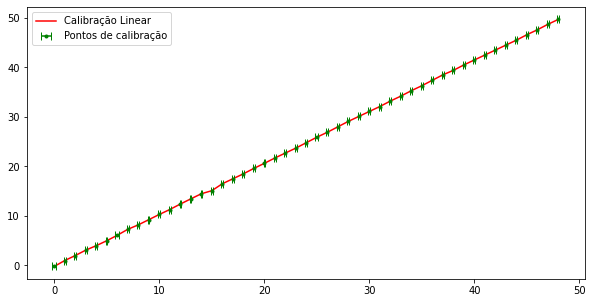

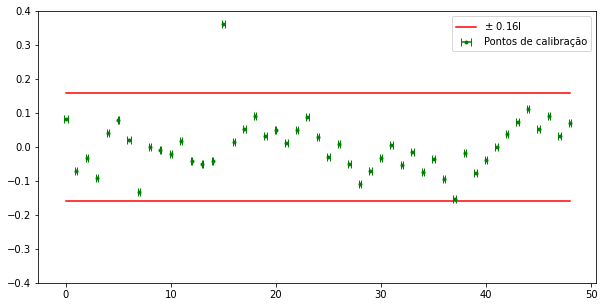

TypeError: BooleanAtom not allowed in this context.

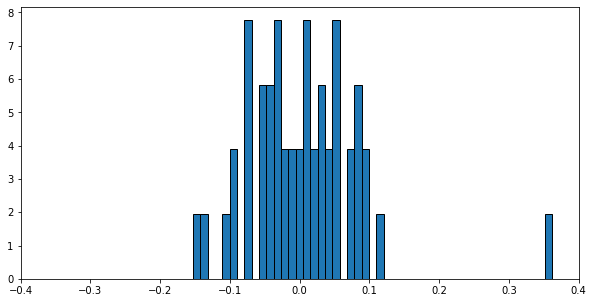

In [4]:
# Com todas as medições, função de 5° grau

y_i_5 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])
x_i_5 = np.array([-0.2, 1, 2, 3.1, 4, 5, 6.1, 7.3, 8.2, 9.25, 10.3, 11.3, 12.4, 13.45, 14.48, 15.1, 16.5, 17.5, 18.5, 19.6, 20.62, 21.7, 22.7, 23.7, 24.8, 25.9, 26.9, 28, 29.1, 30.1, 31.1, 32.1, 33.2, 34.2, 35.3, 36.3, 37.4, 38.5, 39.4, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.6, 47.6, 48.7, 49.7])
Sigma_i_5 = np.array([0.2, 0.1, 0.1, 0.1, 0.1, 0.05, 0.2, 0.1, 0.1, 0.05, 0.1, 0.1, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.05, 0.1, 0.1, 0.1, 0.1, 0.15, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

def p_5(x):
    return a_5 + b_5*x+c_5*x**2+d_5*x**3+e*x**4+f*x**5

vn_5 = []
for i in range(49):
    vn_5.append(p(x_i_5[i]))

    
# Cálculo da incerteza

Vn_vi = 0
di = 0
di_2 = 0
t_48 = 2.0126

Vn_vi = []
di = []

for i in range(0, 48):
    Vn_vi = a+b*x_i[i]
    di = Vn_vi-y_i[i]
    di_2 += di**2
    
u0 = sqrt(di_2/48)
w0 = u0*t_48
w5 = np.array([0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16])
print("u0 = ", u0)
print("w0 = ", w0)

# Plotagem dos gráficos
    
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.figure()
plt.plot(y_i_5,x_i_5,label='Calibração Linear',color='red')
plt.errorbar(y_i_5,x_i_5,xerr=Sigma_i_5,fmt='.', capsize=4, label='Pontos de calibração',color='green')
plt.legend()
plt.show()

di_5=vn_5-y_i_5

plt.figure()
plt.ylim([-.4,.4])
plt.errorbar(y_i_5,-di_5,xerr=Sigma_i_5,fmt='.', capsize=4, label='Pontos de calibração',color='green')
plt.plot(y_i_5,w5,label='$\pm$ 0.16l',color='red')
plt.plot(y_i_5,-w5,color='red')
plt.legend()
plt.show()

plt.figure()
plt.xlim([-.4,.4])
plt.hist(-di_5,bins = len(di_5), density = True,edgecolor="black",label="Distribuição dos desvios")
xmin,xmax = plt.xlim()
med = st.mean(di_5)
desv = u0
eix = np.linspace(xmin,xmax,100)
eiy = norm.pdf(eix,med,desv)
plt.plot(eix,eiy,color='red', label="Distribuição normal", linestyle="--")
plt.legend()
plt.show() 

In [ ]:
# Sem a medição 15, função de 5° grau

y_i_6 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])
x_i_6 = np.array([-0.2, 1, 2, 3.1, 4, 5, 6.1, 7.3, 8.2, 9.25, 10.3, 11.3, 12.4, 13.45, 14.48, 16.5, 17.5, 18.5, 19.6, 20.62, 21.7, 22.7, 23.7, 24.8, 25.9, 26.9, 28, 29.1, 30.1, 31.1, 32.1, 33.2, 34.2, 35.3, 36.3, 37.4, 38.5, 39.4, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.6, 47.6, 48.7, 49.7])
Sigma_i_6 = np.array([0.2, 0.1, 0.1, 0.1, 0.1, 0.05, 0.2, 0.1, 0.1, 0.05, 0.1, 0.1, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.1, 0.05, 0.1, 0.1, 0.1, 0.1, 0.15, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

def p_6(x):
    return a_6 + b_6*x+c_6*x**2+d_6*x**3+e_6*x**4+f_6*x**5

vn_6 = []
for i in range(48):
    vn_6.append(p_6(x_i_6[i]))

    
# Cálculo da incerteza

Vn_vi = 0
di = 0
di_2 = 0
t_47 = 2.01365

for i in range(0, 47):
    Vn_vi = a_2+b_2*x_i_2[i]
    di = Vn_vi-y_i_2[i]
    di_2 += di**2
    
u0 = sqrt(di_2/47)
w0 = u0*t_47
w6 = np.array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])
print("u0 = ", u0)
print("w0 = ", w0)

# Plotagem dos gráficos

plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.figure()
plt.plot(y_i_6,x_i_6,label='Calibração Linear',color='red')
plt.errorbar(y_i_6,x_i_6,xerr=Sigma_i_6,fmt='.', capsize=4, label='Pontos de calibração',color='green')
plt.legend()
plt.show()

di_6=vn_6-y_i_6

plt.figure()
plt.ylim([-.4,.4])
plt.errorbar(y_i_6,di_6,xerr=Sigma_i_6,fmt='.', capsize=4, label='Pontos de calibração',color='green')
plt.plot(y_i_6,w6,label='$\pm$ 0.125l',color='red')
plt.plot(y_i_6,-w6,color='red')
plt.legend(loc ='upper right')
plt.show()

plt.figure()
plt.xlim([-.25,.25])
plt.hist(di_6,bins = len(di_6), density = True,edgecolor="black",label="Distribuição dos desvios")
xmin,xmax = plt.xlim()
med = st.mean(di_6)
desv = u0
eix = np.linspace(xmin,xmax,100)
eiy = norm.pdf(eix,med,desv)
plt.plot(eix,eiy,color='red', label="Distribuição normal", linestyle="--")
plt.legend()
plt.show(

# def p(x):
    return a + b*x
a5=np.polyfit(x,y,5)
p5 = np.poly1d(a5)

x = []
y = []
x5 = []
y5 = []
for i in range(len(X)):
    x.append(i+1-1)
    calc = p(i+1-1)
    y.append(calc)
    x5.append(i+1-1)
    calc = p5(i+1-1)
    y5.append(calc)

di5= []
zip_object = zip(y, y5)
for y_i, y5_i in zip_object:
    di5.append(y_i-y5_i)


plt.figure()
plt.errorbar(x_i,di5,xerr=Sigma_i,fmt='.', markersize='5', capsize=4, elinewidth=2,label='Pontos de calibração',color='green')
plt.plot(x_i,y2,label='$\pm$ 0.29l',color='red')
plt.plot(x_i,y3,color='red')
plt.legend(loc ='upper right')
plt.show()
print(p5)